# Introduction

## Imports and Version

In [1]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

2.18.0


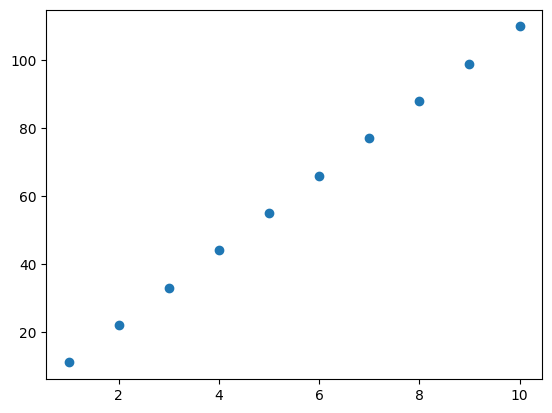

In [171]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 110])

plt.scatter(X,y);

### The relation between X and y
from the graph we can see that, the relation between X and y is linear. Which means the relation will be a eqation of straight line which can be predicted quite easily by hand.

In [3]:
y == (10*X)+X # This is the relation between X and y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Steps in modelling with TensorFlow
1. Creating a model
2. Compiling a model
3. Fitting a model

---
# Model - 1
---


A model has been created using X from above as the input and y from above as the output. The relation between X and y is (y= 10X+X). This relation is set manually which is not a conventional way to build a machine learning/ deep learning model. The relation between the input and output is what the algorithm is supposed to find.

In [4]:
X = tf.expand_dims(tf.constant(X),axis=-1)
y = tf.constant(y)

tf.random.set_seed(42)
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Dense(1))

my_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

my_model.fit(X,y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 54.2616 - mae: 54.2616
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 53.9491 - mae: 53.9491
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 53.6366 - mae: 53.6366
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 53.3241 - mae: 53.3241
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 53.0116 - mae: 53.0116


### Model Improvement - 1

In [5]:
my_model_improvement = tf.keras.Sequential()
my_model_improvement.add(tf.keras.layers.Dense(100, activation='relu'))
my_model_improvement.add(tf.keras.layers.Dense(1))

my_model_improvement.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics = ["mae"])

my_model_improvement.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 60.1541 - mae: 60.1541
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 59.2523 - mae: 59.2523
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 58.3399 - mae: 58.3399
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 57.4119 - mae: 57.4119
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 56.4749 - mae: 56.4749
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 55.5250 - mae: 55.5250
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 54.5600 - mae: 54.5600
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 53.5649 - mae: 53.5649
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 52.5381 - mae: 52.5381
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 51.4744 - mae: 51.4744
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 50.3735 - mae: 50.3735
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 49.2273 - mae: 49.2273
Epoch 13/100
1/1 ━━

In [6]:
X_test = tf.constant([5])
X_test = tf.expand_dims(tf.constant(X_test),axis=-1)
print(X_test)
my_model_improvement.predict(X_test)

tf.Tensor([[5]], shape=(1, 1), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[55.57952]], dtype=float32)

---
# Model - 2
---

For model building, a dataset has been created using ```X=tf.range(1,100,2)``` and ```y=(X**2)+X```. In tf.range(1,100,2), 1 is the starting value, 100 is the ending value and 2 is the step-size. This time, we will build a model by using training-validation-test split. The steps are coded below.

### Creating the dataset

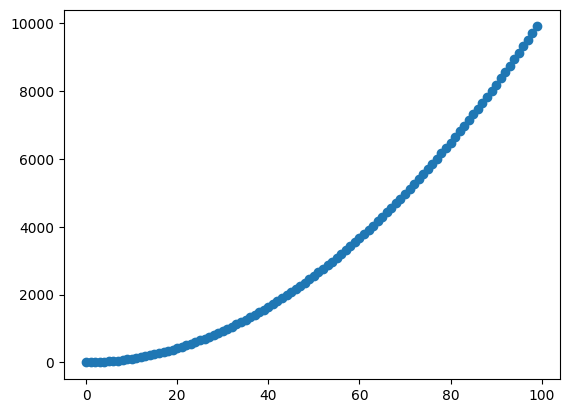

In [7]:
X = tf.range(0,100,1)
y = (X**2)+X

X = tf.expand_dims(tf.constant(X),axis=-1)

plt.scatter(X,y);

### Splitting the dataset into Train & Test

In [8]:
precent_80 = int(len(X)*0.8)

X_train = X[:precent_80]
y_train = y[:precent_80]

X_test = X[precent_80:]
y_test = y[precent_80:]

### Plotting the train & test data

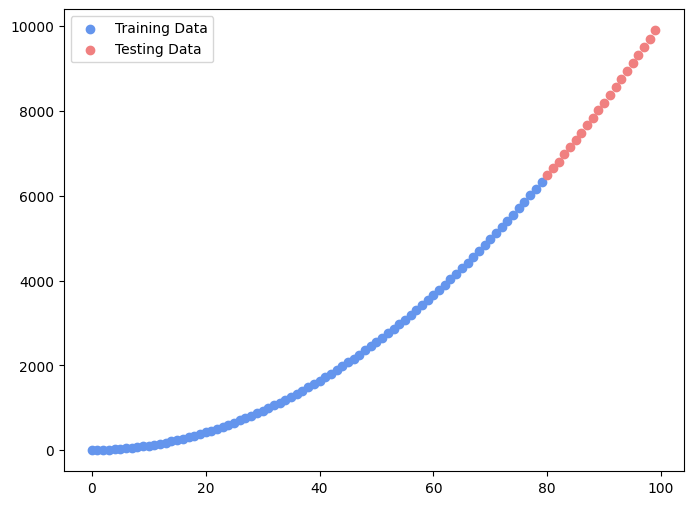

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, c="cornflowerblue", label="Training Data")
plt.scatter(X_test, y_test, c="lightcoral", label="Testing Data")

plt.legend();

### Building the model

In [10]:
X[0], y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [163]:
tf.random.set_seed(42)

my_model_2 = tf.keras.Sequential(name="Model-2")
my_model_2.add(tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"))
my_model_2.add(tf.keras.layers.Dense(10, input_shape=[1],name="hideel_layer"))
my_model_2.add(tf.keras.layers.Dense(1, input_shape=[1],name="output_layer"))

my_model_2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
                   metrics = [tf.keras.metrics.MeanAbsoluteError()])

my_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model-2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hideel_layer (Dense)                 │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

*  **Trainable Parameters:** The parameters which the model updates while it is in the training process.
*  **Non-trainable Parameters:** The parameters that does not update during the training process. (Happens with transfer learning)

<a href="https://stackoverflow.com/questions/47312219/what-is-the-definition-of-a-non-trainable-parameter">***Google for more***</a>

---

### Fitting the model

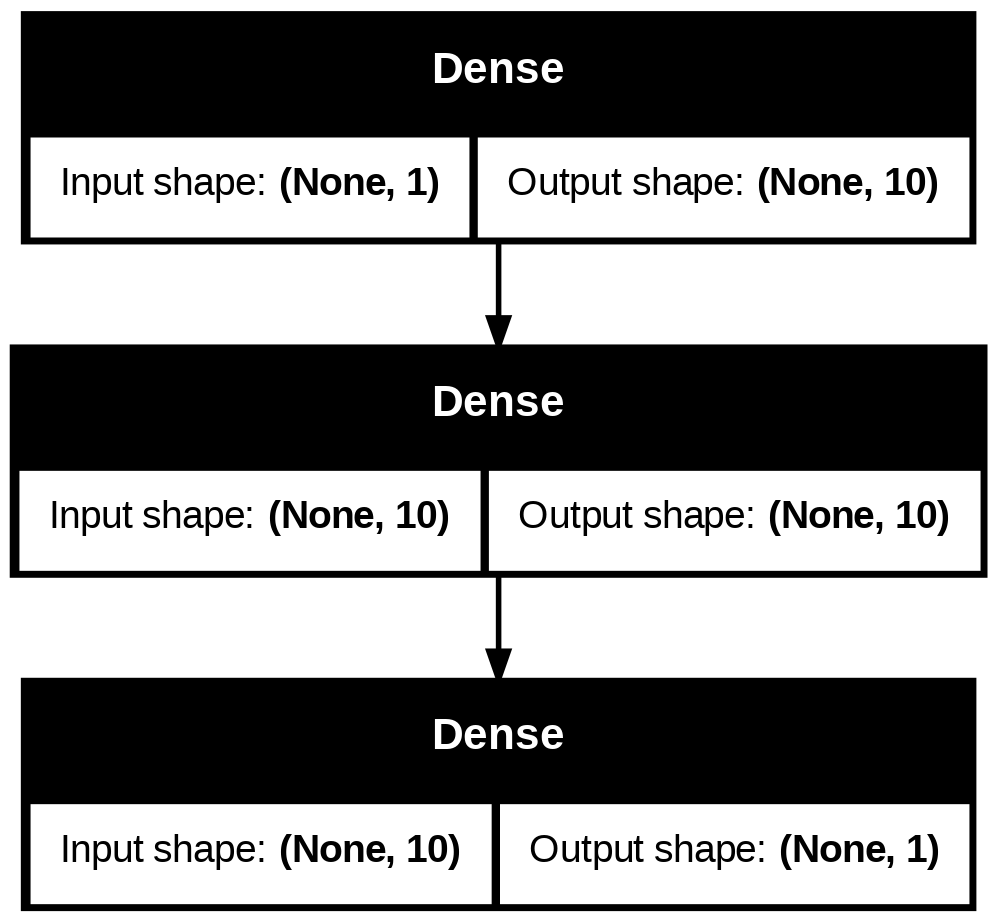

In [164]:
plot_model(model=my_model_2, show_shapes=True)

In [165]:
my_model_2.fit(X,y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3365.7798 - mean_absolute_error: 3365.7798
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3124.3220 - mean_absolute_error: 3124.3220 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2566.8013 - mean_absolute_error: 2566.8013
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1584.8876 - mean_absolute_error: 1584.8876
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1193.0786 - mean_absolute_error: 1193.0786
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1330.1334 - mean_absolute_error: 1330.1334
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 986.9325 - mean_absolute_error: 986.9325  
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1120.5464 - mean_absolute_error: 1120.5464
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1084.3201 - mean_absolute_error: 1084.3201
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1003.3022 - mean_absolute_error

### Making a function to compare between true value and Predicted Value

In [166]:
def makeComparison(y_pred, y_test=y_test, X_test=X_test):
  print("True Value VS Predicted Value")
  print("#############################")
  for i in range(len(y_pred)):
    print("True Value:",y_test[i].numpy(),
          "|| Predicted Value:",y_pred[i][0])

In [167]:
y_pred = my_model_2.predict(X_test)
makeComparison(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: 6075.793
True Value: 6642 || Predicted Value: 6175.15
True Value: 6806 || Predicted Value: 6274.508
True Value: 6972 || Predicted Value: 6373.865
True Value: 7140 || Predicted Value: 6473.222
True Value: 7310 || Predicted Value: 6572.5806
True Value: 7482 || Predicted Value: 6671.9375
True Value: 7656 || Predicted Value: 6771.2954
True Value: 7832 || Predicted Value: 6870.6523
True Value: 8010 || Predicted Value: 6970.0103
True Value: 8190 || Predicted Value: 7069.367
True Value: 8372 || Predicted Value: 7168.725
True Value: 8556 || Predicted Value: 7268.0825
True Value: 8742 || Predicted Value: 7367.44
True Value: 8930 || Predicted Value: 7466.7974
True Value: 9120 || Predicted Value: 7566.155
True Value: 9312 || Predicted Value: 7665.5117
True Value: 9506 || Predicted Value: 7764.8696
True Value: 9702 || Predicted Value: 7864.2275
True Value: 9900 ||

In [168]:
def plotPredictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
  plt.figure(figsize=(8,6))
  plt.scatter(train_data, train_labels, c="cornflowerblue", label="Training Data")
  plt.scatter(test_data, test_labels, c="lightcoral", label="Testing Data")
  plt.scatter(test_data, predictions, c="darkorange", label="Test Predictions")
  plt.legend();

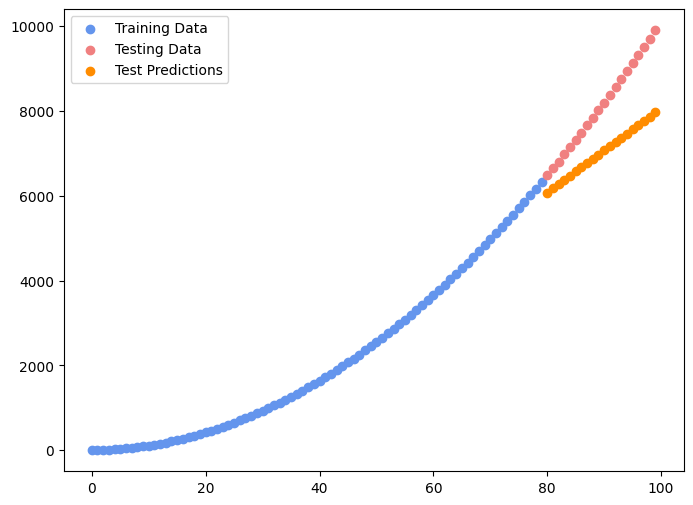

In [169]:
  plotPredictions();

In [18]:
def get_MAE_MSE(y_pred=y_pred, y_test=y_test):
  MAE = np.mean(abs(y_test - y_pred))
  MSE = np.mean((y_test - y_pred)**2)
  return MAE, MSE
MAE,MSE = get_MAE_MSE(y_pred)
print(MAE)
print(MSE)

2758.595
9182861.35


### Tips on improving a model:
* Expand the dataset
* Make the model larger (Add more layers)
* Train for longer (if not overfits)
---


---
# Model - 3
---


In [135]:
tf.random.set_seed(42)

my_model_3 = tf.keras.Sequential(name="Model-3")
my_model_3.add(tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"))
my_model_3.add(tf.keras.layers.Dense(10, input_shape=[1],name="hidden_layer"))
my_model_3.add(tf.keras.layers.Dense(1, input_shape=[1],name="output_layer"))

my_model_3.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = [tf.keras.metrics.MeanSquaredError()])

my_model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model-3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

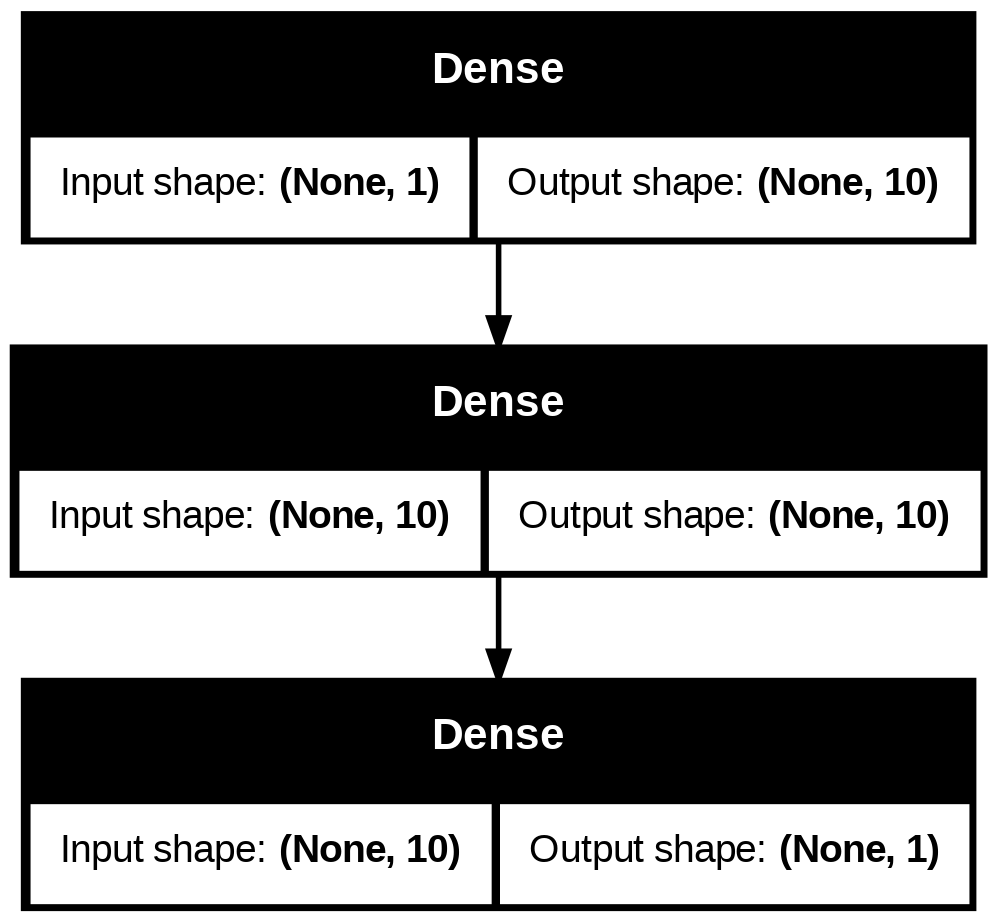

In [136]:
plot_model(model=my_model_3, show_shapes=True)

In [137]:
my_model_3.fit(X,y, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3213.7922 - mean_squared_error: 19429664.0000 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1034456093687808.0000 - mean_squared_error: 73585003173775374693382894911488.0000
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: nan - mean_squared_error: nan                                  
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan - mean_squared_error: nan
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - mean_squared_error: nan
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: nan - mean_squared_error: nan
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: nan - mean_squared_error: nan
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - mean_squared_error: nan
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - mean_squared_error: nan
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - mean_squared_error: nan
Epoch 11/500
4/4

In [138]:
y_pred_2 = my_model_3.predict(X_test)
makeComparison(y_pred_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: nan
True Value: 6642 || Predicted Value: nan
True Value: 6806 || Predicted Value: nan
True Value: 6972 || Predicted Value: nan
True Value: 7140 || Predicted Value: nan
True Value: 7310 || Predicted Value: nan
True Value: 7482 || Predicted Value: nan
True Value: 7656 || Predicted Value: nan
True Value: 7832 || Predicted Value: nan
True Value: 8010 || Predicted Value: nan
True Value: 8190 || Predicted Value: nan
True Value: 8372 || Predicted Value: nan
True Value: 8556 || Predicted Value: nan
True Value: 8742 || Predicted Value: nan
True Value: 8930 || Predicted Value: nan
True Value: 9120 || Predicted Value: nan
True Value: 9312 || Predicted Value: nan
True Value: 9506 || Predicted Value: nan
True Value: 9702 || Predicted Value: nan
True Value: 9900 || Predicted Value: nan


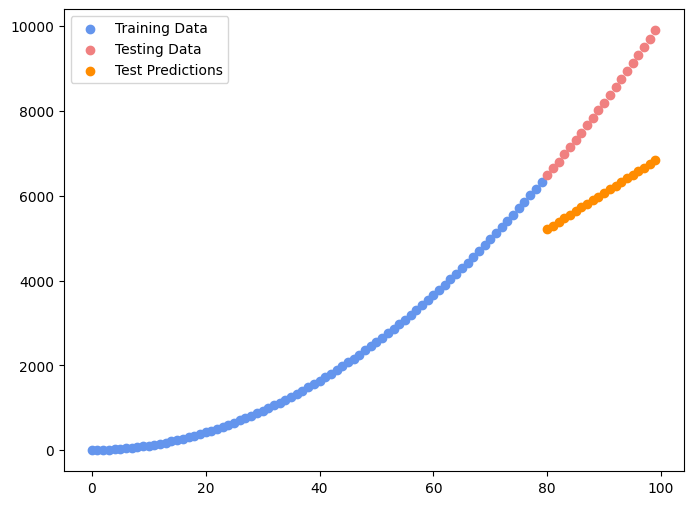

In [139]:
plotPredictions(predictions=y_pred);

In [140]:
MAE_2,MSE_2 = get_MAE_MSE(y_pred)
print(MAE_2)
print(MSE_2)

2116.41
5772958.4


### Why does Model-3 shows worse result than Model-2 even after building the model with higher epochs?
--> Model-3 has too much epochs with caused the model to overfit. Overfitting causes the model perfom worse then model-3.

# Models Comparison

In [141]:
model_results = [["Model-1", MAE, MSE],
                 ["Model-2", MAE_2, MSE_2]]
results_frame = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
print(results_frame);

     Model       MAE         MSE
0  Model-1  2758.595  9182861.35
1  Model-2  2116.410  5772958.40


---
# Saving and Loading Models
---

## Saving models

Two main methods of saving models are,
1. The SavedModel format
2. The HDF5 format

### Using SavedModel format to keep a model saved

In [185]:
tf.saved_model.save(my_model_2, "my_model_2") # "my_model_2" means, it will save the model in the current directory

### Using HDF5 format to keep the model saved

In [186]:
my_model_2.save("my_model_2.h5")

### Using Keras format to keep the model saved

In [187]:
my_model_2.save("my_model_2.keras")

## Loading models

### Loading SavedModel format

In [195]:
model_2_loaded_SM = tf.saved_model.load("my_model_2") # This method is depricated, it is better to try any other option

### Loading HDF5 format

In [188]:
model_2_loaded_HDF5 =  tf.keras.models.load_model('my_model_2.h5')
print(model_2_loaded_HDF5)
y_pred_2 = model_2_loaded_HDF5.predict(X_test)
makeComparison(y_pred_2)

<Sequential name=Model-2, built=True>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: 6075.793
True Value: 6642 || Predicted Value: 6175.15
True Value: 6806 || Predicted Value: 6274.508
True Value: 6972 || Predicted Value: 6373.865
True Value: 7140 || Predicted Value: 6473.222
True Value: 7310 || Predicted Value: 6572.5806
True Value: 7482 || Predicted Value: 6671.9375
True Value: 7656 || Predicted Value: 6771.2954
True Value: 7832 || Predicted Value: 6870.6523
True Value: 8010 || Predicted Value: 6970.0103
True Value: 8190 || Predicted Value: 7069.367
True Value: 8372 || Predicted Value: 7168.725
True Value: 8556 || Predicted Value: 7268.0825
True Value: 8742 || Predicted Value: 7367.44
True Value: 8930 || Predicted Value: 7466.7974
True Value: 9120 || Predicted Value: 7566.155
True Value: 9312 || Predicted Value: 7665.5117
True Value: 9506 || Predicted Value: 7764.8696
True Value: 9702 || Predicte

### Loading Keras format

In [182]:
model_2_loaded_keras =  tf.keras.models.load_model('my_model_2.keras')
y_pred_3 = model_2_loaded_keras.predict(X_test)
makeComparison(y_pred_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: 5212.597
True Value: 6642 || Predicted Value: 5297.947
True Value: 6806 || Predicted Value: 5383.296
True Value: 6972 || Predicted Value: 5468.646
True Value: 7140 || Predicted Value: 5553.9956
True Value: 7310 || Predicted Value: 5639.345
True Value: 7482 || Predicted Value: 5724.695
True Value: 7656 || Predicted Value: 5810.0444
True Value: 7832 || Predicted Value: 5895.3936
True Value: 8010 || Predicted Value: 5980.742
True Value: 8190 || Predicted Value: 6066.0923
True Value: 8372 || Predicted Value: 6151.442
True Value: 8556 || Predicted Value: 6236.792
True Value: 8742 || Predicted Value: 6322.141
True Value: 8930 || Predicted Value: 6407.49
True Value: 9120 || Predicted Value: 6492.8403
True Value: 9312 || Predicted Value: 6578.19
True Value: 9506 || Predicted Value: 6663.539
True Value: 9702 || Predicted Value: 6748.8887
True Value: 9900 || Pred

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
